# Packages required


In [1]:
%pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [3]:


import pandas as pd



# Import the dataset and preprocessing

numpy
matplot lib 
seaborn

In [13]:
# Specify the file path
file_path = 'data/mnist.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p142,p143,p144,p145,p146,p147,p148,p149,p150,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,197,0,0,1
1,0,0,0,0,245,0,0,0,0,0,...,0,0,0,0,0,0,253,0,0,0
2,0,0,0,0,234,0,45,0,0,10,...,0,0,0,0,0,0,253,253,202,0
3,0,0,0,0,0,0,17,0,0,143,...,0,0,0,0,0,0,0,0,201,0
4,0,0,0,0,254,0,15,0,0,98,...,0,0,0,0,0,0,0,0,93,0


In [14]:
all_zero_columns = df.columns[df.eq(0).all()]
print(all_zero_columns.size)

43


In [15]:
# Drop the columns with all zeros
df = df.drop(all_zero_columns, axis=1)

# Save the cleaned dataset to a new file
cleaned_file_path = 'data/mnist_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


# cleaned dataset upload

In [4]:
# Specify the file path
cleaned_file_path = 'data/mnist_cleaned.csv'

# Read the cleaned dataset into a pandas DataFrame
df_cleaned = pd.read_csv(cleaned_file_path)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

# check for columns with the same value
same_value_columns = df_cleaned.columns[df_cleaned.nunique() == 1]
print(same_value_columns.size)

# split in to features and labels
df_cleaned_features = df_cleaned.iloc[:, :-1]
df_cleaned_labels = df_cleaned.iloc[:, -1]

0


In [5]:
print(df_cleaned_features.head())
print(df_cleaned_labels.head())
print(df_cleaned_features.shape)
print(df_cleaned_labels.shape)

   p01  p03  p05  p07  p09  p10  p12  p14  p15  p16  ...  p135  p136  p137  \
0    0    0    0    0    0    0    0  139    0    0  ...     0   254     0   
1    0    0  245    0    0    0  207   54    0    0  ...     0   240     0   
2    0    0  234   45    0   10  253  176    0    0  ...     0   253   254   
3    0    0    0   17    0  143    0  210    0    0  ...    44   172     0   
4    0    0  254   15    0   98   19   28    0    0  ...     0     0     0   

   p138  p141  p144  p146  p148  p149  p150  
0     0   160     0     0   197     0     0  
1     0   248     0     0   253     0     0  
2     0    94     0     0   253   253   202  
3     0     0     0     0     0     0   201  
4     0     0     0     0     0     0    93  

[5 rows x 107 columns]
0    1
1    0
2    0
3    0
4    0
Name: class, dtype: int64
(5500, 107)
(5500,)


In [6]:
print(type(df_cleaned_features))

<class 'pandas.core.frame.DataFrame'>


# algorithms


## ABOD


In [7]:
data_abod = df_cleaned_features
labels_abod = df_cleaned_labels

# Import the ABOD class
from pyod.models.abod import ABOD
from sklearn.metrics import classification_report
import numpy as np

# Initialize the FastABOD model
model_fast_abod = ABOD(contamination=1/11, method='fast', n_neighbors=20)

# Convert to numpy array with float64 dtype
data_abod_np = np.array(data_abod, dtype=np.float64)

# Fit the model to the data
model_fast_abod.fit(data_abod_np)

# Compare the results with the true labels
report_abod = classification_report(labels_abod, model_fast_abod.labels_, zero_division=0)
print(report_abod)



              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.22      0.22      0.22       500

    accuracy                           0.86      5500
   macro avg       0.57      0.57      0.57      5500
weighted avg       0.86      0.86      0.86      5500



In [11]:
label_diff_abod = labels_abod - model_fast_abod.labels_
label_sum_abod = labels_abod + model_fast_abod.labels_

In [14]:
print("True positives is referred to inliers that are correctly classified as inliers")
print("True positives: ",(label_sum_abod==0).sum())
print("True negatives: ",(label_sum_abod==2).sum())
print("False positives: ",(label_diff_abod==-1).sum())
print("False negatives:",(label_diff_abod==1).sum())

True positives is referred to inliers that are correctly classified as inliers
True positives:  4608
True negatives:  108
False positives:  392
False negatives: 392


## Isolation forest (IF)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_iforest.py:308: UserWarning: max_samples (5000) is greater than the total number of samples (4400). max_samples will be set to n_samples for estimation.
  warn(


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1000
           1       0.17      0.20      0.18       100

    accuracy                           0.84      1100
   macro avg       0.54      0.55      0.54      1100
weighted avg       0.85      0.84      0.84      1100

ROC-AUC Score: 0.55


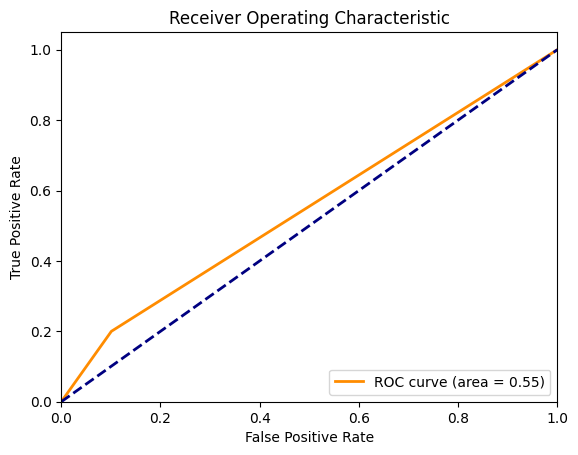

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

data_if = df_cleaned_features
labels_if = df_cleaned_labels

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(data_if, labels_if, test_size=0.2, stratify=labels_if, random_state=42)

# Feature scaling
scaler_if = StandardScaler()
X_train_scaled = scaler_if.fit_transform(X_train)
X_test_scaled = scaler_if.transform(X_test)

# Initialize model
model = IsolationForest(n_estimators=400, max_samples=5000, max_features=107, contamination=1/11)

# Fit model on training data and predict anomalies on test data
model.fit(X_train_scaled)
anomalies = model.predict(X_test_scaled)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
anomalies = [0 if x == 1 else 1 for x in anomalies]

# Print classification report
print(classification_report(y_test, anomalies, zero_division=0)) 

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, anomalies)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, anomalies)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Second implementation.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [16]:
data_if = df_cleaned_features
labels_if = df_cleaned_labels

# Feature scaling
scaler_if = StandardScaler()
scaled_data_if = scaler_if.fit_transform(data_if)

In [17]:
# Initialize model
model = IsolationForest(n_estimators=200, max_samples= 5000, max_features=107,contamination=1/11)

# Fit model and predict anomalies
anomalies = model.fit_predict(scaled_data_if)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
anomalies = [0 if x == 1 else 1 for x in anomalies]

# Assuming you have true labels for evaluation
print(classification_report(df_cleaned_labels, anomalies,zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.19      0.19      0.19       500

    accuracy                           0.85      5500
   macro avg       0.55      0.55      0.55      5500
weighted avg       0.85      0.85      0.85      5500



In [18]:
label_diff_if = df_cleaned_labels - anomalies
label_sum_if = df_cleaned_labels + anomalies

print("True positives: ",(label_sum_if==0).sum())
print("True negatives: ",(label_sum_if==2).sum())
print("False positives: ",(label_diff_if==-1).sum())
print("False negatives:",(label_diff_if==1).sum())

True positives:  4595
True negatives:  95
False positives:  405
False negatives: 405


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50],
    'max_samples': [128, 256],
    'max_features': [5, 10],
    'contamination': [0.1]
}

# Initialize the model
model = IsolationForest()
# Specify a scoring metric for GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_data_if)

# Get the best hyperparameter settings
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

In [35]:
# Fit the best model
best_model.fit(scaled_data_if)

# Predict anomalies
best_anomalies = best_model.predict(scaled_data_if)

# Convert anomalies to 0 and 1 for normal and anomaly respectively
best_anomalies = [0 if x == 1 else 1 for x in best_anomalies]

In [37]:
print(classification_report(df_cleaned_labels, best_anomalies,zero_division=0))

print(anomalies.count(1))

print(df_cleaned_labels.sum())

print(best_anomalies[:10])

print(df_cleaned_labels[:10])

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      5000
           1       0.06      0.06      0.06       500

    accuracy                           0.82      5500
   macro avg       0.48      0.48      0.48      5500
weighted avg       0.83      0.82      0.82      5500

5000
500
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: class, dtype: int64


## deep iForest

In [55]:
from sklearn.preprocessing import StandardScaler
from pyod.models.dif import DIF


ModuleNotFoundError: No module named 'torch'

In [54]:
data_dif = df_cleaned_features
labels_dif = df_cleaned_labels

# Feature scaling
scaler_dif = StandardScaler()
scaled_data_dif = scaler_dif.fit_transform(data_dif)

In [ ]:
# Create an instance of the DIF model
model_dif = DIF(contamination=1/11)

# Fit the model to your data
model_dif.fit(scaled_data_dif)

# Predict the binary labels (0: inliers, 1: outliers)
scores_dif = model_dif.labels_

# Compare the results with the true labels
report_dif = classification_report(labels_dif, scores_dif, zero_division=0)

In [ ]:
labels_diff_dif = labels_dif - scores_dif
labels_sum_dif = labels_dif + scores_dif

print("True positives: ",(labels_sum_dif==0).sum())
print("True negatives: ",(labels_sum_dif==2).sum())
print("False positives: ",(labels_diff_dif==-1).sum())
print("False negatives:",(labels_diff_dif==1).sum())

## PCA

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate the features and labels
X = df_cleaned_features
y = df_cleaned_labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)

# Calculate the anomaly score
distances = np.linalg.norm(X_scaled - pca.inverse_transform(X_pca), axis=1)
scores_pca = distances - np.mean(distances)
scores_pca = np.abs(scores_pca)

# Set a threshold for anomaly detection
threshold = np.percentile(scores_pca, 93)

# Identify outliers
outliers = np.where(scores_pca > threshold)[0]

In [48]:
# Create an array of zeros
labels_pca = np.zeros(len(y))

# Set the outlier position to 1
labels_pca[outliers] = 1

print(labels_pca[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
# Print the outliers
print("Number of outliers:", len(outliers))

labels_diff_pca = y - labels_pca
labels_sum_pca = y + labels_pca

print("True positives: ",(labels_sum_pca==0).sum())
print("True negatives: ",(labels_sum_pca==2).sum())
print("False positives: ",(labels_diff_pca==-1).sum())
print("False negatives:",(labels_diff_pca==1).sum())

Number of outliers: 385
True positives:  4767
True negatives:  152
False positives:  233
False negatives: 348


## kNN 

In [51]:
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split


contamination = 1/11  # percentage of outliers

# Generate sample data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_cleaned_features, df_cleaned_labels, test_size=0.2, stratify=labels_if, random_state=42)

# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=contamination, n_neighbors=15)
clf.fit(X_train_knn)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_knn_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_knn_pred = clf.predict(X_test_knn)  # outlier labels (0 or 1)
y_test_knn_scores = clf.decision_function(X_test_knn)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train_knn, y_train_knn_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test_knn, y_test_knn_scores)


On Training Data:
KNN ROC:0.6935, precision @ rank n:0.2325

On Test Data:
KNN ROC:0.68, precision @ rank n:0.21
